In [129]:
#libraries
import pandas as pd
import warnings
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.functions import *
sns.set(rc={'figure.figsize':(10,8), 'font.size': 1.3})

In [130]:
#DataFrames
warnings.filterwarnings("ignore")
df_dataset = pd.read_csv('datasets/SetRegexFin.csv')
df_comorb = pd.read_csv('datasets/regex_comorb.csv')
df_antfam = pd.read_csv('datasets/regex_antfam.csv')
df_diag = pd.read_csv('datasets/regex_diag.csv')
df_catescolar = pd.read_csv('datasets/CatEscolaridad.csv')
df_catedociv = pd.read_csv('datasets/CatEstadoCivil.csv')
df_catlgbt = pd.read_csv('datasets/CatLgbt.csv')
df_catEstrato = pd.read_csv('datasets/CatEstratoSocial.csv')
df_catocup = pd.read_csv('datasets/CatOcupacion.csv')
df_pais = pd.read_csv('datasets/Pais.csv')
df_lugnac = pd.read_csv('datasets/LugNac.csv')
df_EUA = pd.read_csv('datasets/EstadosEUA.csv')
df_cat008 = pd.read_csv('datasets/CatComunMet008.csv')
df_nivsoc = pd.read_csv('datasets/CatEstratoSocial.csv')

In [131]:
def gen_list(df):
    listexc = []
    list = ['FolioId','Migracion', 'Edad', 'Sexo', 'EstadoCivil', 'Escolaridad' , 'Ocupacion', 'NivSocioEco', 'ComunidadIndigena', 'DiscapacidadPerceptual' ]
    for col in df.columns:
        if col not in list:
            listexc.append(col)
    return listexc
    

In [132]:
def get_psm(df_dataset, listinclude):
    psm = PsmPy(df_dataset, treatment= 'Migracion', indx= 'FolioId', exclude = listinclude)
    psm.logistic_ps()
    return psm

In [133]:
def moddatagen(df_dataset):
    df_dataset['Migracion'] = df_dataset['Migracion'].fillna(0)
    df_dataset['Migracion'] = df_dataset['Migracion'].replace('Si', 1)
    df_dataset['ComunidadIndigena'] = df_dataset['ComunidadIndigena'].fillna(0)
    df_dataset['ComunidadIndigena'] = df_dataset['ComunidadIndigena'].replace('Si', 1)
    df_dataset['DiscapacidadPerceptual'] = df_dataset['DiscapacidadPerceptual'].fillna(0)
    df_dataset['DiscapacidadPerceptual'] = df_dataset['DiscapacidadPerceptual'].replace('Si', 1)
    df_dataset['Migracion']
    return df_dataset


In [134]:
def dict_data (df_catescolar, df_catedociv, df_catlgbt, df_catocup, df_pais, df_nivsoc):
    dict_escolar = dict(zip(df_catescolar['Descripcion'], df_catescolar['ComunId']))
    dict_edociv = dict(zip(df_catedociv['Descripcion'], df_catedociv['ComunId']))
    dict_lgbt = dict(zip(df_catlgbt['Descripcion'], df_catlgbt['ComunId']))
    dict_ocup = dict(zip(df_catocup['Descripcion'], df_catocup['ComunId']))
    dict_pais = dict(zip(df_pais['PaisId'], df_pais['Descripcion']))
    dict_nivsoc = dict(zip(df_nivsoc['ComunId'], df_nivsoc['Descripcion']))
    

    return dict_escolar, dict_edociv, dict_lgbt, dict_ocup, dict_pais, dict_nivsoc

In [135]:
def mod_data (df ,dict_escolar, dict_edociv, dict_lgbt, dict_ocup, dict_pais, dict_nivsoc):
    df['Escolaridad'] = df['Escolaridad'].map(dict_escolar)
    df['EstadoCivil'] = df['EstadoCivil'].map(dict_edociv)
    df['LGBTTTI'] = df['LGBTTTI'].map(dict_lgbt)
    df['Ocupacion'] = df['Ocupacion'].map(dict_ocup)
    df['PaisNac'] = df['LugarNacimiento'].map(dict_pais)
    df['NivSocioEco'] = df['NivSocioEco'].map(dict_nivsoc)
    return df
    

In [136]:
def mod_df (df):
    df.drop(columns=['Motivo10', 'Diag_TRS_Eje1ComunNomenclatura_9', 'Diag_TRS_Eje1Previo-Subsecuente_9', 'Diag_TRS_Eje1CodigoCompuesto_9', 'Diag_TRS_Eje1Codigo_9', 'Diag_TRS_Eje1Descripcion_9', 'Diag_TRS_Eje1ComunNomenclatura_10', 'Diag_TRS_Eje1Previo-Subsecuente_10', 'Diag_TRS_Eje1CodigoCompuesto_10', 'Diag_TRS_Eje1Codigo_10', 'Diag_TRS_Eje1Descripcion_10'] , axis=1, inplace=True)
    df.drop(columns=['AntecedentesPNPGrupoSanguineo', 'AntecedentesPNPFactorRH', 'TipoAlimentacionSuficienteCantidad', 'TipoAlimentacionSuficienteCalidad', 'TipoAlimentacionAdecuadaCantidad', 'TipoAlimentacionAdecuadaCalidad', 'TipoAlimentacionBalanceadaCantidad', 'TipoAlimentacionBalanceadaCalidad', 'AntecedentesPNPReligion', 'AntecedentesPNPCuales'], axis=1, inplace=True)
    df.drop(columns=['PadecimientoActual', 'AntecedentesPadecimiento', 'AntecedentesHFTrastornosSustanciasComunId', 'AntecedentesHFTrastornosSustanciasCuales', 'AnecedentesHFTrastornosMentalesComunId', 'AnecedentesHFTrastornosMentalesCuales', 'AntecedentesHFOtrosComunId', 'AntecedentesHFOtrosCuales', 'VidaFamiliarEscolarLaboralEconomica' , 'AntecedentesSSEdadIVSA','AntecedentesSSNoParejasSexuales', 'AntecedentesSSPracticasSexualesRiesgoCuales', 'AntecedentesSSMetodosAnticonceptivosOtros', 'AntecedentesSSPruebaVIH' ], axis=1, inplace=True)
    df.drop(columns=['AntecedentesSSPruebaVIHFecha', 'AntecedentesSSPruebaVIHResultadoComun', 'AntecedentesSSPruebaVHC', 'AntecedentesSSPruebaVHCFecha', 'AntecedentesSSPruebaVHCResultadoComun', 'InterrogatorioASCardiovascularCuales', 'InterrogatorioASDigestivoCuales', 'InterrogatorioASEndocrinoCuales', 'InterrogatorioASHematologicoCuales', 'InterrogatorioASMusculoEsqueleticoCuales', 'InterrogatorioASNerviosoCuales'], axis=1, inplace=True)
    df.drop(columns=['InterrogatorioASReproductivoCuales', 'InterrogatorioASRespiratorioCuales', 'InterrogatorioASTegumentarioCuales', 'InterrogatorioASUrinarioCuales', 'InterrogatorioASEspecializadoCuales', 'SignosVitalesPeso', 'SignosVitalesTalla', 'SignosVitalesIMCComunId', 'SignosVitalesFC', 'SignosVitalesFR', 'SignosVitalesPulso', 'SignosVitalesTA', 'SignosVitalesTAhg', 'SignosVitalesTemperatura', 'HCEF_HabitusExterior', 'ExploracionEspecializadaCuales'], axis=1, inplace=True)
    return df

In [137]:
def graf_psm(psm):
    psmdata = psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None, drop_unmatched=True)
    psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel='Propensity logit', names = ['Migracion', 'No Migracion'], colors = ['blue', 'red'], save=True)

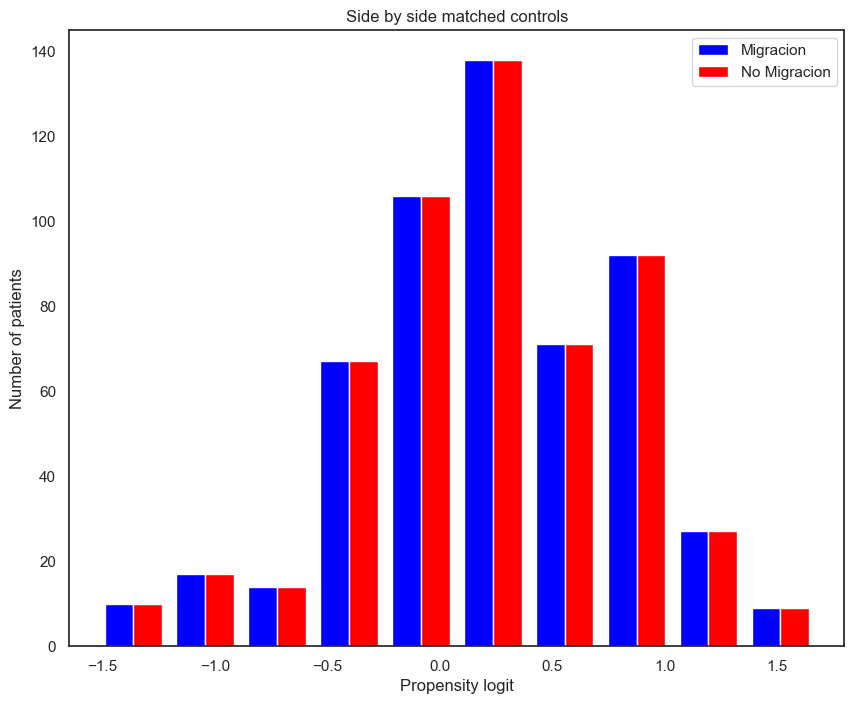

In [138]:
dict_escolar, dict_edociv, dict_lgbt, dict_ocup, dict_pais, dict_nivsoc  = dict_data(df_catescolar, df_catedociv, df_catlgbt, df_catocup, df_pais, df_nivsoc)
df = mod_df(df_dataset)
listexclude = gen_list(df_dataset)
df_dataset = moddatagen(df_dataset)
df = mod_data(df_dataset, dict_escolar, dict_edociv, dict_lgbt, dict_ocup, dict_pais, dict_nivsoc)
psm = get_psm(df, listexclude)
graf_psm(psm)

In [139]:
psm.df_matched

,FolioId,Sexo,Edad,EstadoCivil,Escolaridad,Ocupacion,ComunidadIndigena,DiscapacidadPerceptual,propensity_score,propensity_logit,Migracion,matched_ID
0,304773,1.0,24.0,1,10,1,0,0,0.536436,0.146004,1,371985.0
1,304816,1.0,33.0,3,11,8,0,0,0.788557,1.316249,1,368960.0
2,304873,1.0,32.0,1,6,5,0,0,0.565861,0.264984,1,308930.0
3,304911,1.0,28.0,1,8,5,0,0,0.628294,0.524905,1,304851.0
4,304993,1.0,31.0,3,6,5,0,0,0.534788,0.139377,1,385850.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1097,375530,2.0,63.0,2,5,7,0,0,0.604425,0.423936,0,NaN
1098,323745,1.0,27.0,1,5,4,0,0,0.419086,-0.326526,0,NaN
1099,330063,2.0,69.0,2,11,7,0,0,0.736000,1.025282,0,NaN
1100,345083,1.0,24.0,1,10,1,0,0,0.577718,0.313414,0,NaN
